# CS105 Final Project
Group Members: August Bennett, Jalen Shen, Johnny To, Justin Ly
## Dataset
https://www.icpsr.umich.edu/web/NACJD/studies/27521

NOTE: Dataset is VERY Large (~3000) variables.
### Initial Features
These were the features selected to be possibly useful for us to make our classification model.
| Variable Name 	| Description                                       	|
|---------------	|---------------------------------------------------	|
| NODR30A       	| USUAL # OF DRINKS PER DAY PAST 30 DAYS            	|
| RK5ALWK       	| RISK HAVING 5 OR MORE DRINKS ONCE OR TWICE A WEEK 	|
| GRSKD4_5      	| GREAT RISK: HAVE 4-5 ALC DRINKS PER DAY           	|
| ALCPHCTD      	| CONTD TO DRINK ALC DESPITE PHYS PRBS              	|
| ALCEMCTD      	| CONTD TO DRINK ALC DESPITE EMOT PRBS              	|
| ALCFMCTD      	| CONTD TO DRINK ALC DESPITE PRBS W/ FAM/FRNDS      	|
| TXYRINAD      	| RES ALC/DRG REH TRMT FOR ALC, DRUGS, OR BOTH      	|
| TXILALEV      	| RECEIVED TREATMENT FOR DRG OR ALC USE IN LIFETIME 	|
| GENDER_R      	|  MALE (& FEMALE)                                  	|
| AGE_YRS       	| AGE IN YEARS RECODE                               	|
| ALCTRY        	| AGE WHEN FIRST DRANK ALCOHOLIC BEVERAGE           	|
| ALCREC        	| TIME SINCE LAST DRANK ALCOHOLIC BEVERAGE          	|
| ALCYRTOT      	| TOTAL # OF DAYS USED ALCOHOL IN PAST 12 MOS       	|
| IRALCFY       	| ALCOHOL FREQUENCY PAST YEAR - IMPUTATION REVISED  	|
| TOTDRINK      	| TOTAL # OF DAYS USED ALCOHOL IN PAST 12 MOS       	|
| TXEVER        	| EVER RECEIVED ALCOHOL OR DRUG TREATMENT           	|
| ALLARRST      	| ANY ARREST                                        	|
| ALCYDAYS      	| # OF DAYS USED ALCOHOL IN PAST YEAR               	|

After researching and using the user guide that was given to us via the study we revised our features. The main reason was some features that we selected were missing a large amount of responses. (some participants may have decided to skip the question). Below is the revised feature list.
| Variable Name 	| Description                                       	|
|---------------	|---------------------------------------------------	|
| NODR30A       	| USUAL # OF DRINKS PER DAY PAST 30 DAYS            	|
| ALCTRY        	| AGE WHEN FIRST DRANK ALCOHOLIC BEVERAGE           	|
| ALCREC        	| TIME SINCE LAST DRANK ALCOHOLIC BEVERAGE          	|
| IRALCFY       	| ALCOHOL FREQUENCY PAST YEAR - IMPUTATION REVISED  	|
| TOTDRINK      	| TOTAL # OF DAYS USED ALCOHOL IN PAST 12 MOS       	|
| ALCYDAYS      	| # OF DAYS USED ALCOHOL IN PAST YEAR               	|
| IRSEX          	| GENDER                                            	|
| AGE_YRS       	| AGE IN YEARS RECODE                               	|
| BOOKED      	    | EVER ARRESTED AND BOOKED FOR BREAKING THE LAW         |

These new variables were cleaned and made into a new file called cs105_dataset.csv



<Axes: title={'center': 'Respondant Distribution by Age'}, xlabel='AGE_YRS'>

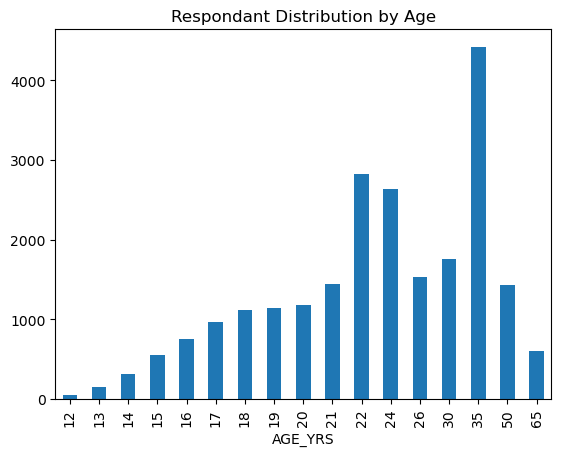

In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("cs105_dataset.csv")

by_age = df.groupby('AGE_YRS')['AGE_YRS'].count()
by_age.plot(kind='bar', title='Respondant Distribution by Age')

Here we see a bimodal age distribution among respondants, with one peak in the early twenties and another at 35. Note the sudden jump in respondant age from 30 to 35, 35 to 50, and 50 to 65. This could be due to several factors. It's possible that the surveyors more heavily targeted certain age groups. Alteratively, older respondants may have elected to give a rougher estimation of their age or omit their responses.

<Axes: title={'center': 'Respondant Breakdown by Gender'}>

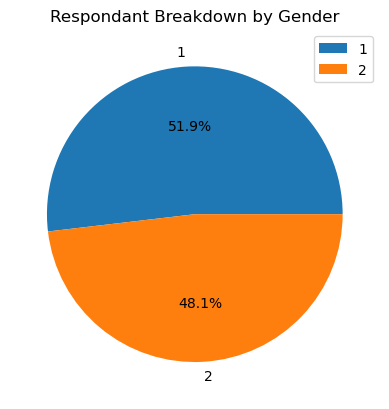

In [32]:
df.groupby('IRSEX').size().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Respondant Breakdown by Gender')

The data represents both male (1) and female (2) respondants. There is a slight bias of 1.9 percentage points in favor of male respondants, but not significantly so.

<Axes: title={'center': 'Average Number of Drinks Per Day Over Previous Month, by Gender'}, xlabel='IRSEX'>

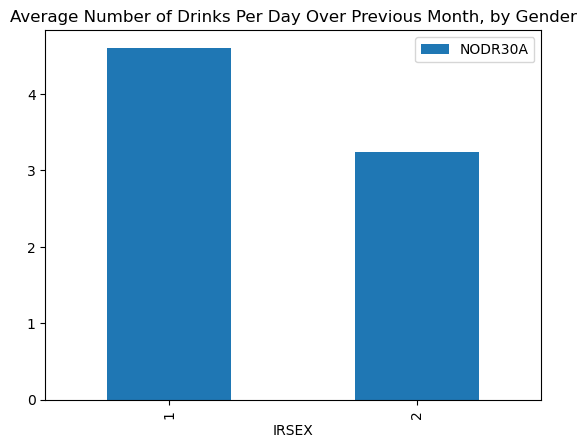

In [37]:
pt_dpd_gdr = pd.pivot_table(data=df, values='NODR30A', index='IRSEX', aggfunc='mean')
pt_dpd_gdr.loc[[1,2]].plot(kind='bar', title='Average Number of Drinks Per Day Over Previous Month, by Gender')

Here we see that men, on average, estimate drinking 4-5 drinks per day while women average somewhat lower at just over 3. As an aside, we observed a handful of outlier responses that may be due to a misinterpretation of the question. Certain respondants gave answers in the range of 20 to 30 drinks daily. A reasonable explanation to this could be that the question was interpreted such that some respondants estimated the total number of drinks consumed within the past thirty days.

<Axes: title={'center': 'Count of Respondants Arrested and Booked, by Gender'}, xlabel='IRSEX'>

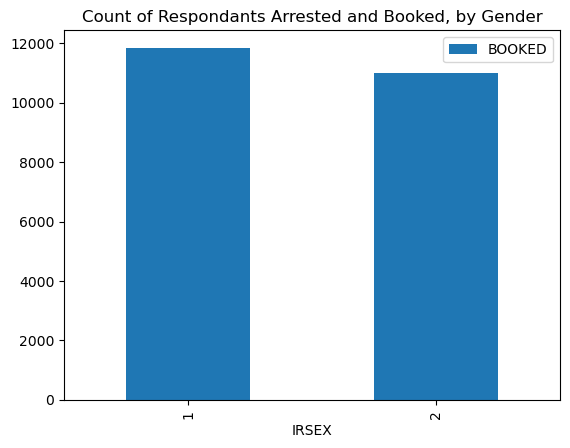

In [55]:
pt_booked_gdr = pd.pivot_table(data=df, values='BOOKED', index='IRSEX', aggfunc='count')
pt_booked_gdr.loc[[1,2]].plot(kind='bar', title='Count of Respondants Arrested and Booked, by Gender')

Broken down by gender, the count of male respondants arrested for any crime is slightly higher than among female respondants. This is consistent to the above findings that there was a slight male bias among responses, implying that respondant gender does not have a strong bearing on their arrest record. 